In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sample_sub=pd.read_csv('sample_submission.csv')

In [3]:
sample_sub.head() # 제출 형식 예시 (prediction.csv라는 이름으로 제출)

,user_id,merchant_id,prob
0,163968,4605,0.5
1,360576,1581,0.5
2,98688,1964,0.5
3,98688,3645,0.5
4,295296,3361,0.5


In [4]:
####### data format1: format1이 더 간단한 형식 (format1과 2는 똑같은 데이터)

In [5]:
user_info=pd.read_csv('./data_format1/user_info_format1.csv')

In [6]:
user_info.head() # 유저 정보

,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0
3,186135,5.0,0.0
4,30230,5.0,0.0


In [7]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    424170 non-null  int64  
 1   age_range  421953 non-null  float64
 2   gender     417734 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.7 MB


In [7]:
user_log=pd.read_csv('./data_format1/user_log_format1.csv')

In [8]:
user_log.rename(columns={'seller_id':'merchant_id'}, inplace=True)

In [9]:
user_log.head() # 유저 로그

,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0


In [10]:
user_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54925330 entries, 0 to 54925329
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      int64  
 1   item_id      int64  
 2   cat_id       int64  
 3   merchant_id  int64  
 4   brand_id     float64
 5   time_stamp   int64  
 6   action_type  int64  
dtypes: float64(1), int64(6)
memory usage: 2.9 GB


In [11]:
train_data=pd.read_csv('./data_format1/train_format1.csv')

In [12]:
train_data.head() # training data

,user_id,merchant_id,label
0,34176,3906,0
1,34176,121,0
2,34176,4356,1
3,34176,2217,0
4,230784,4818,0


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260864 entries, 0 to 260863
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   user_id      260864 non-null  int64
 1   merchant_id  260864 non-null  int64
 2   label        260864 non-null  int64
dtypes: int64(3)
memory usage: 6.0 MB


In [15]:
########## data format2

In [16]:
# train2_data=pd.read_csv('C:/Users/821÷02/Desktop/클라우드 쓰세요/2023-2/AI를 위한 머신러닝/competition/data_format2/train_format2.csv')
# train2_data.head() # 로그가 분리되어 있지 않다 (format1은 분리되어 있음)

In [18]:
### 데이터 전처리 해야 할 것들
# 1. 나이대 분류가 애매하다 *
# ---> 특정 나이대에 데이터 개수가 몰려 있어서 나눈 것이 아닐까?
# ---> 그리고 8은 unknown age 데이터인 것 같다. (7은 50살 이상)
# 2. user_info의 결측치 / 2(성별을 모르거나 NULL)인 값 처리 *
# ---> 제출형식에 성별은 없으므로, 성별을 모르는 경우에도 분석해도 될 듯
# 3. 결측치 얼마나 있는지 체크 
# 4. timestamp 컬럼 사용할 시 형식 바꾸기 -> Github 참고
# 5. user_log의 seller_id -> merchant_id로 통일 *
# (이외에 더 전처리 할 것 없는지 찾기)

In [14]:
user_info[user_info['gender']==2] # 성별이 2인 것 개수: 10426

,user_id,age_range,gender
10,149002,5.0,2.0
42,116591,4.0,2.0
47,182794,6.0,2.0
55,97984,5.0,2.0
72,15868,5.0,2.0
...,...,...,...
423431,277998,3.0,2.0
423667,410416,0.0,2.0
423672,279024,3.0,2.0
423832,332019,NaN,2.0


In [15]:
user_info['gender'].isnull().sum() # 결측치 꽤 있음

6436

In [16]:
user_info[user_info['age_range']==0].count() # 나이대별 데이터 개수
# 1: 24명
# 2: 52871명 *
# 3: 111654명 *
# 4: 79991명 *
# 5: 40777명 *
# 6: 35464명
# 7: 6992명
# 8: 1266명
# 0: 92914명 -> unknown age 
# ---> 20~30대(2~5)에 데이터 개수가 몰려 있어서 20대, 30대는 초반, 후반으로 나눈 것으로 추정
# 7과 8 모두 50대 이상 / 0은 NULL or unknown --> 50대 이상은 7로 통일하는 게 좋을 듯

user_id      92914
age_range    92914
gender       90638
dtype: int64

In [17]:
user_info['gender'] = user_info['gender'].fillna(2) # 성별 결측치는 2로 --> 해결

In [18]:
user_info['age_range'].isnull().sum()

2217

In [19]:
user_info['age_range'] = user_info['age_range'].fillna(0) # 나이에도 결측치 존재 --> 0으로 변경

In [20]:
user_info = user_info.replace({'age_range' : 8}, 7) # 7, 8 모두 50대 이상이므로 7로 통일

In [21]:
user_info['age_range'].unique()

array([6., 5., 4., 7., 3., 0., 2., 1.])

In [22]:
user_info.head()

,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0
3,186135,5.0,0.0
4,30230,5.0,0.0


In [23]:
user_info.info() # user_info의 결측치 문제 모두 해결

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    424170 non-null  int64  
 1   age_range  424170 non-null  float64
 2   gender     424170 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.7 MB


In [24]:
user_log.isnull().sum() # brand에 결측치가 91015개 --> 어떻게 해결해야 할까?

# 브랜드가 무엇인지 모르지만, 제출 형식은 '유저가 반복 구매할 확률'이기 때문에
# 브랜드를 몰라도 item, cat, merchant 중 하나라도 값이 있으므로
# 굳이 제거할 필요는 없다고 생각하는데 의견 묻기

user_id            0
item_id            0
cat_id             0
merchant_id        0
brand_id       91015
time_stamp         0
action_type        0
dtype: int64

In [25]:
user_log.tail() # user_log의 데이터 개수: 총 54925329개

,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type
54925325,208016,107662,898,1346,7995.0,1110,0
54925326,208016,1058313,898,1346,7995.0,1110,0
54925327,208016,449814,898,983,7995.0,1110,0
54925328,208016,634856,898,1346,7995.0,1110,0
54925329,208016,272094,898,1346,7995.0,1111,0


In [26]:
### 해결해야 할 남은 전처리 문제
# 1. user_log의 brand 결측치 어떻게 할 것인가
# 2. user_log의 time_stamp는 어떻게 할까 -> Github 참고
# 3. 성별 모르는 경우 -> 산 물건 학습으로 판단하여 성별 예측, 결측치 보간
# 4. 나이 모르는 경우 --> 나이도 3.과 같은 방식으로 결측치 보간?
# 5. (age_range에도 결측치 존재 --> 0으로 바꿔줘야 함)

In [27]:
# 날짜--> 요일 --> 어떤 날에 어떤 물건이 많이 팔렸는지
# 성별 별로 구매한 품목 차이 보기
# ---> 이를 바탕으로 성별 예측, 결측치 보간
# 유저 한 사람이 다양한 사람에게 물건을 사는지, 하나의 물건만 집중해서 사는지 예측
# 한 유저가 몇 번 클릭하고 장바구니에 넣었는지 유저 기준으로 확인
# 활용 방안: 고객에게 맞춤형 추천 가능, 어떤 물건이 잘 팔리는지, 기업 입장에서 마케팅 비용 아끼고
# 고객 입장에서도 이득
# 작품 사진: 예측 모델, ROC 커브

In [28]:
# EDA는 각자
# 문서 내용 나눴으면 함
# 목적: 블랙프라이데이에 유입된 신규 유저가 계속 지속될 것인가

In [29]:
# ex) unique, 가설 세우고 충성도 체크 (브랜드, 상인 등..)
# 각자 하나씩 분석, 시각화 해보기
# label 불균형 -> smooth -> 모델 성능 높임

In [30]:
df_black = user_log[user_log['time_stamp']==1111] # BF 데이터
df_black.head()

,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type
171,328862,406349,1280,2700,5476.0,1111,0
172,328862,406349,1280,2700,5476.0,1111,0
173,328862,807126,1181,1963,6109.0,1111,0
174,328862,406349,1280,2700,5476.0,1111,2
175,328862,406349,1280,2700,5476.0,1111,0


In [31]:
df_black['action_type'].value_counts().sort_index() # BF의 action_type

0    9188104
1      14725
2    1223354
3     156450
Name: action_type, dtype: int64

In [32]:
df_not_black = user_log[user_log['time_stamp']!=1111] # BF를 제외한 데이터
df_not_black.head()

,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0


In [33]:
df_not_black.sort_values(by=['time_stamp'], inplace=True)
df_not_black

/var/folders/1b/dx8_94fs0q740wx3lfknk6y40000gn/T/ipykernel_70419/2057325596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_black.sort_values(by=['time_stamp'], inplace=True)


,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type
51799636,259239,86481,833,3610,3161.0,511,3
36117974,236323,323261,1467,2217,3012.0,511,2
36117973,236323,406828,302,1663,4874.0,511,3
41549303,57117,870911,302,1464,1217.0,511,3
41549302,57117,682642,662,1102,1214.0,511,3
...,...,...,...,...,...,...,...
29109390,215207,369703,1181,2822,4273.0,1112,0
11141649,1835,371379,821,3315,1605.0,1112,0
21982733,194364,217717,1580,2138,300.0,1112,0
34940082,288420,640393,500,2456,7061.0,1112,0


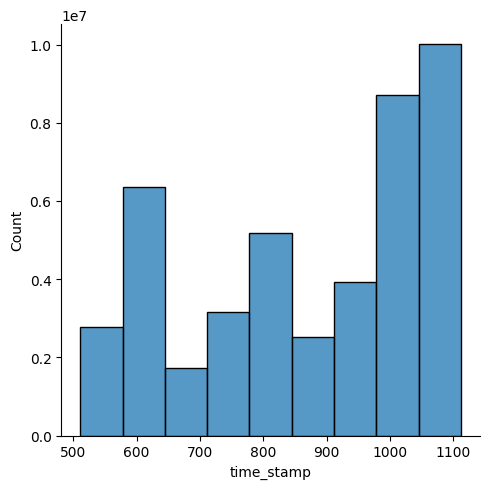

In [34]:
# 6개월 간 총 행동 변화 count 추이
sns.displot(df_not_black['time_stamp'], bins=9)

In [35]:
## 이상치 제거
# IQR 구하기
q1=df_not_black['time_stamp'].value_counts().quantile(0.25)
q2=df_not_black['time_stamp'].value_counts().quantile(0.5)
q3=df_not_black['time_stamp'].value_counts().quantile(0.75)
iqr=q3-q1
low_outlier=q1-1.5*iqr
high_outlier= q3+1.5*iqr
print('q1-1.5*iqr: %d' % low_outlier)
print('q3+1.5*iqr: %d' % high_outlier)

q1-1.5*iqr: 49747
q3+1.5*iqr: 350411


In [36]:
df_not_black_count = df_not_black['time_stamp'].value_counts().sort_index()
df_not_black_count=df_not_black_count.to_frame()
df_not_black_count=df_not_black_count.reset_index()

In [37]:
df_not_black_count.rename(columns={'index':'date', 'time_stamp':'count'}, inplace=True)

In [38]:
df_not_black_count

,date,count
0,511,20044
1,512,20704
2,513,23730
3,514,24388
4,515,24113
...,...,...
180,1107,857846
181,1108,968099
182,1109,1207273
183,1110,2940826


In [39]:
a_low=df_not_black_count[df_not_black_count['count']<=low_outlier]
a_high=df_not_black_count[df_not_black_count['count']>=high_outlier]
a_low=a_low['date'].to_list()
a_high=a_high['date'].to_list()
a_outlier=a_low+a_high
a_outlier 

# 블랙프라이데이 세일 시즌이 10/28 ~ 11/11인 것으로 추정

[511,
 512,
 513,
 514,
 515,
 516,
 517,
 518,
 519,
 1112,
 626,
 909,
 1028,
 1029,
 1030,
 1031,
 1101,
 1102,
 1103,
 1104,
 1105,
 1106,
 1107,
 1108,
 1109,
 1110]

In [40]:
df_not_black_count[df_not_black_count['date']==1028]

,date,count
170,1028,368445


In [41]:
df_not_black_count[df_not_black_count['date']==1112]

,date,count
184,1112,46


In [42]:
df_noout_noblack=df_not_black.copy()

In [43]:
df_noout_noblack = df_not_black[~df_not_black['time_stamp'].isin(a_outlier)]

In [44]:
df_noout_noblack.head() # outlier 제거한 데이터!!!

,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type
527155,272634,1001901,351,4951,69.0,520,0
41296989,276152,554161,387,606,376.0,520,0
21855143,408223,269716,1604,2468,1392.0,520,0
527159,272634,91297,351,4918,3535.0,520,0
41296988,276152,1016801,1505,606,376.0,520,0


In [45]:
# 블랙프라이데이와 평상시의 변동률

In [46]:
rand_time = df_noout_noblack['time_stamp'].sample(1).iloc[0] # 특정 날짜 랜덤 추출 (BF 제외)
sample_df = df_noout_noblack[df_noout_noblack['time_stamp']==rand_time] # 특정 날짜의 데이터만 추출
print(rand_time)
print(sample_df['action_type'].value_counts().sort_index())

522
0    231128
1        81
2     14387
3     11921
Name: action_type, dtype: int64


In [47]:
# 딕셔너리 생성
action_type_counts = {0: 0, 1: 0, 2: 0, 3: 0}

# 반복 횟수
num_iterations = 30

for i in range(num_iterations):
    # 특정 날짜 랜덤하게 뽑기
    rand_time = df_noout_noblack['time_stamp'].sample(1).iloc[0]

    # 특정 날짜의 데이터만 추출
    sample_df = df_noout_noblack[df_noout_noblack['time_stamp'] == rand_time]

    # 특정 날짜의 action_type 빈도 수 측정
    type_counts = sample_df['action_type'].value_counts().sort_index().to_dict()

    # Update the cumulative counts
    for action_type, count in type_counts.items():
        action_type_counts[action_type] += count

# Calculate and print the average counts
for action_type, cumulative_count in action_type_counts.items():
    avg_count = cumulative_count / num_iterations
    print(f'avg_{action_type}: {avg_count}')

avg_0: 194376.86666666667
avg_1: 144.83333333333334
avg_2: 11970.166666666666
avg_3: 12675.9


In [48]:
compare_df = pd.DataFrame(list(action_type_counts.items()), columns=["action_type", "average"])
for i in range(0, 4):
    compare_df['average'][i] = int(compare_df['average'][i]/30)
compare_df

,action_type,average
0,0,194376
1,1,144
2,2,11970
3,3,12675


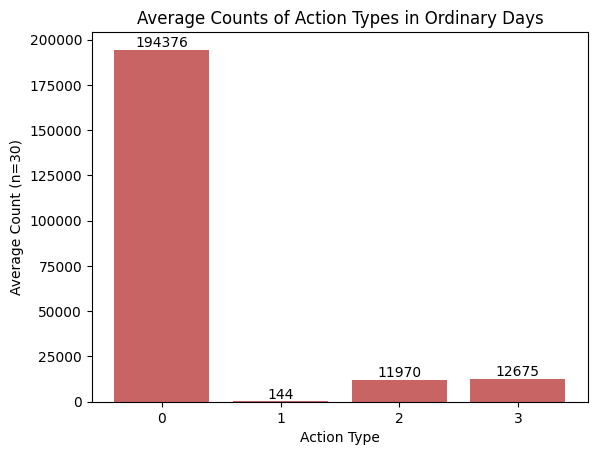

In [49]:
bars_normal = plt.bar(compare_df['action_type'], compare_df['average'], color='firebrick', alpha=0.7)
plt.xlabel('Action Type')
plt.ylabel('Average Count (n=30)')
plt.title('Average Counts of Action Types in Ordinary Days')
plt.xticks([0, 1, 2, 3])

for bar, count in zip(bars_normal, compare_df['average']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, str(count), ha='center', va='bottom')

In [50]:
df_black['action_type'].value_counts().sort_index()

0    9188104
1      14725
2    1223354
3     156450
Name: action_type, dtype: int64

In [51]:
df_black2 = df_black['action_type'].value_counts().sort_index().to_frame()
df_black2 = df_black2.rename(columns={'action_type':'count'})
df_black2.insert(loc=0, column='action_type', value=[0, 1, 2, 3])
df_black2

,action_type,count
0,0,9188104
1,1,14725
2,2,1223354
3,3,156450


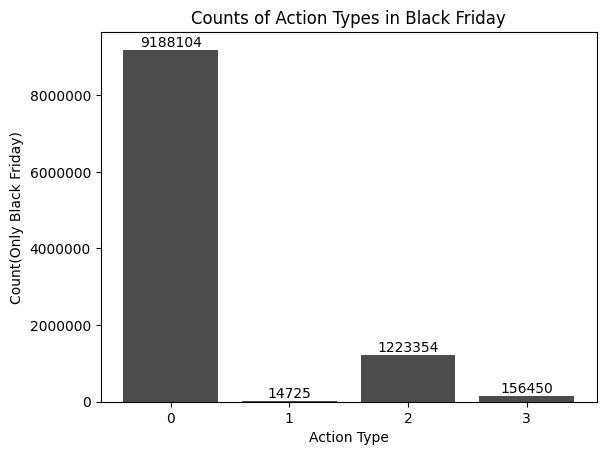

In [52]:
plt.ticklabel_format(style='plain')
bars_bf = plt.bar(df_black2['action_type'], df_black2['count'], color='black', alpha=0.7)
plt.xlabel('Action Type')
plt.ylabel('Count(Only Black Friday)')
plt.title('Counts of Action Types in Black Friday')
plt.xticks([0, 1, 2, 3])

for bar, count in zip(bars_bf, df_black2['count']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, str(count), ha='center', va='bottom')

In [53]:
click_rateofchange = ((df_black2['count'][0] - compare_df['average'][0]) / (compare_df['average'][0])) * 100
add_to_cart_rateofchange = ((df_black2['count'][1] - compare_df['average'][1]) / (compare_df['average'][1])) * 100
purchase_rateofchange = ((df_black2['count'][2] - compare_df['average'][2]) / (compare_df['average'][2])) * 100
add_to_favorite_rateofchange = ((df_black2['count'][3] - compare_df['average'][3]) / (compare_df['average'][3])) * 100

print('** rateofchange between BF and ordinary days **')
print('click: %d%%' % click_rateofchange)
print('add-to-cart: %d%%' % add_to_cart_rateofchange)
print('purchase: %d%%' % purchase_rateofchange)
print('add-to-favorite: %d%%' % add_to_favorite_rateofchange)

# 잘못 나온 수치가 아니라, 정말 Black Friday와 평상시의 변동률이 매우 큰 듯함. 

** rateofchange between BF and ordinary days **
click: 4626%
add-to-cart: 10125%
purchase: 10120%
add-to-favorite: 1134%


In [54]:
# 다음 분석: 블랙프라이데이에도 원래 사던 상인/브랜드에 대한 충성도가 유지되는가?
# 아니면 블랙프라이데이에는 다른 걸 사는가?
# (+ 성별에 따라 상인, 브랜드의 선호가 유의미하게 다른가?)

# 일단 블랙프라이데이에 반복구매한 사람을 대상으로

In [55]:
# 블랙프라이데이에 구매한 고객 중, id 랜덤 추출
rand_customer = df_black['user_id'].sample(1).iloc[0]
rand_customer

127851

In [56]:
# 반복구매한 적 있는 고객들
train_data[train_data['label']==1]

,user_id,merchant_id,label
2,34176,4356,1
7,231552,3828,1
53,306816,1489,1
57,176256,3323,1
59,307584,1340,1
...,...,...,...
260747,208511,2592,1
260793,87935,1964,1
260794,87935,3734,1
260799,350591,4394,1


In [57]:
num_iteration=15952
rep_user_id=[]

for i in range(num_iteration):
    rep_user_id.append(train_data['user_id'].iloc[i])

In [58]:
# 반복구매한 적 있으며, 블랙프라이데이에도 구매한 고객들
df_black_rep = df_black[df_black['user_id'].isin(rep_user_id)]
df_black_rep

,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type
4158,255390,934988,611,4585,8011.0,1111,0
4159,255390,616588,611,4585,8011.0,1111,0
4160,255390,652623,1188,4257,4103.0,1111,0
4161,255390,252728,1188,4257,6742.0,1111,0
4162,255390,934988,611,4585,8011.0,1111,0
...,...,...,...,...,...,...,...
54922252,323205,765379,407,1595,5800.0,1111,0
54922253,323205,202160,384,4845,3345.0,1111,0
54922254,323205,1046260,407,4845,3345.0,1111,0
54922255,323205,750095,1505,2468,1392.0,1111,0


In [59]:
# 일단은 모르는 브랜드(결측치)는 0으로 지정
df_black_rep['brand_id'] = df_black_rep['brand_id'].fillna(0)

/var/folders/1b/dx8_94fs0q740wx3lfknk6y40000gn/T/ipykernel_70419/302177666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_black_rep['brand_id'] = df_black_rep['brand_id'].fillna(0)


In [60]:
# 블랙프라이데이에 구매한 고객의 평상시 주문 내역
df_not_black[df_not_black['user_id']==245561] 

# 블프, 평상시 모두 포함 주문내역
# user_log[user_log['user_id']==245561] 

# (참고: 블프 세일 기간은 10/28 ~ 11/11로 추정)

,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type
23057171,245561,716611,1577,3128,8391.0,622,0
23057172,245561,991373,1505,3189,7697.0,622,0
23057168,245561,901634,1505,3189,7697.0,622,0
23057169,245561,526585,1505,3189,7697.0,622,0
23057059,245561,735739,662,4976,6143.0,627,3
23057120,245561,239421,715,1956,2072.0,704,0
23057121,245561,239421,715,1956,2072.0,704,0
23057122,245561,239421,715,1956,2072.0,704,0
23057125,245561,239421,715,1956,2072.0,704,0
23057123,245561,239421,715,1956,2072.0,704,0


In [61]:
len(df_black_rep['user_id'].unique()) # 블프&평상시 중복구매자는 13015명
# 이 사람들의 id와 merchant/brand의 id를 각각 뽑고
# black 데이터의 merchant/brand와 일치하는지 확인
# 일치하는 값만 뽑아보기

13015